<a href="https://colab.research.google.com/github/1phalleyscomet/2025-1/blob/main/machinlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

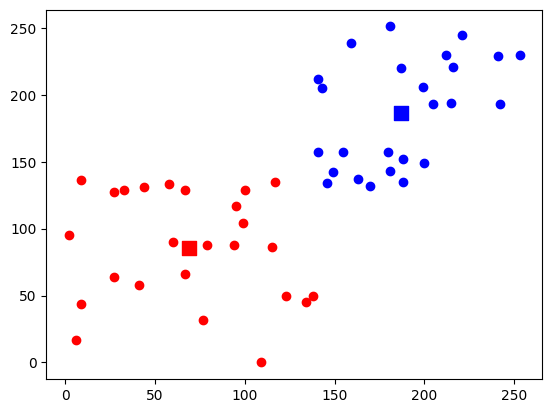

In [1]:
#k-means rand num cluster
import numpy as np,cv2
import matplotlib.pyplot as plt

a=np.random.randint(0,150,(25,2))
b=np.random.randint(128,255,(25,2))
data=np.vstack((a,b)).astype(np.float32)
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
ret,label,center=cv2.kmeans(data,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
red=data[label.ravel()==0]
blue=data[label.ravel()==1]

plt.scatter(red[:,0],red[:,1],c='r')
plt.scatter(blue[:,0],blue[:,1],c='b')
plt.scatter(center[0,0],center[0,1],s=100,c='r',marker='s')
plt.scatter(center[1,0],center[1,1],s=100,c='b',marker='s')
plt.show()

In [ ]:
#16 of color cluster
import cv2
import numpy as np

k=16
img=cv2.imread('img_latte.png')
data=img.reshape((-1,3)).astype(np.float32)
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center=np.uint8(center)
result=center[label.flatten()]
result=result.reshape((img.shape))
merged=np.hstack((img,result))
cv2.imshow('result',merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#MNIST handwright num image-set common module
import numpy as np,cv2
data=None
k=list(range(10))

def load():
    global data
    image=cv2.imread('mnist.png') #http://yann.lecun.com/exdb/mnist/
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    cells=[np.hsplit(row,100) for row in np.vsplit(gray,50)]
    data=np.array(cells)

def getData(reshape=True):
    if data is None:  load()
    if reshape:
        full=data.reshape(-1,400).astype(np.float32)
    else:
        full=data
    labels=np.repeat(k,500).reshape(-1,1)
    return (full, labels)

def getTrain(reshape=True):
    if data is None: load()
    train = data[:,:90]
    if reshape:
        train = train.reshape(-1,400).astype(np.float32)
    train_labels=np.repeat(k,450).reshape(-1,1)
    return(train,train_labels)

def getTest(reshape=True):
    if data is None: load()
    test = data[:,90:100]
    if reshape:
        test = test.reshape(-1,400).astype(np.float32)
    test_labels=np.repeat(k,50).reshape(-1,1)
    return(test,test_labels)

def digit2data(src,reshape=True):
    h,w=src.shape[:2]
    square=src
    if h>w:
        pad=(h-w)//2
        square=np.zeros((h,h),dtype=np.uint8)
        square[:,pad:pad+w, :]=src
    elif h<w:
        pad=(w-h)//2
        square=np.zeros((w,w),dtype=np.uint8)
        square[pad:pad+h,:]=src
    px20=np.zeros((20,20),np.uint8)
    px20[2:18,2:18]=cv2.resize(square,(16,16),interpolation=cv2.INTER_AREA)
    if reshape:
        px20=px20.reshape((1,400)).astype(np.float32)
    return px20

In [ ]:
#MNIST handwright cluster using k-means
import cv2,numpy as np
import matplotlib.pyplot as plt
import mnist

data,_=mnist.getData()
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
ret,label,center=cv2.kmeans(data,10,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
for i in range(10):
    cent_img=center[i].reshape(20,20).astype(np.uint8)
    plt.subplot(2,5,i+1)
    plt.imshow(cent_img,'gray')
    plt.xticks([]);plt.yticks([])
plt.show()

ret:1.0,result:[[1.]],neighbours:[[0. 1. 1.]],distance:[[ 16. 197. 360.]]


/tmp/ipython-input-4214666977.py:9: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(red[:,0],red[:,1],80,'r','^')
/tmp/ipython-input-4214666977.py:10: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(blue[:,0],blue[:,1],80,'b','s')
/tmp/ipython-input-4214666977.py:12: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')


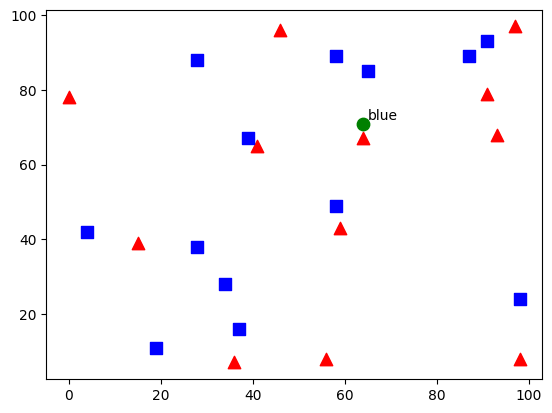

In [3]:
#k-nn rand num cluster
import cv2, numpy as np
import matplotlib.pyplot as plt

trainData=np.random.randint(0,100,(25,2)).astype(np.float32)
labels=np.random.randint(0,2,(25,1))
red=trainData[labels.ravel()==0]
blue=trainData[labels.ravel()==1]
plt.scatter(red[:,0],red[:,1],80,'r','^')
plt.scatter(blue[:,0],blue[:,1],80,'b','s')
newcomer=np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')
knn=cv2.ml.KNearest_create()
knn.train(trainData,cv2.ml.ROW_SAMPLE,labels)
ret,results,neighbours,dist=knn.findNearest(newcomer,3)
print('ret:%s,result:%s,neighbours:%s,distance:%s'%(ret,results,neighbours,dist))
plt.annotate('red' if ret==0.0 else 'blue',xy=newcomer[0],xytext=(newcomer[0]+1))
plt.show()

ret:1.0,result:[[1.]],neighbours:[[1. 1. 1.]],distance:[[170. 314. 866.]]


/tmp/ipython-input-237262822.py:9: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(action[:,0],action[:,1],80,'b','^',label='action')
/tmp/ipython-input-237262822.py:10: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(comedy[:,0],comedy[:,1],80,'r','s',label='comedy')
/tmp/ipython-input-237262822.py:12: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(newcomer[:,0],newcomer[:,1],200,'g','s',label='new')


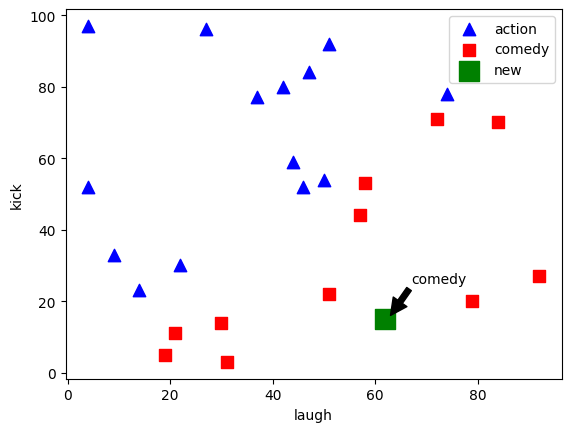

In [7]:
#k-nn movie cluster
import cv2, numpy as np
import matplotlib.pyplot as plt

trainData=np.random.randint(0,100,(25,2)).astype(np.float32)
responses=(trainData[:,0]>trainData[:,1]).astype(np.float32)
action=trainData[responses==0]
comedy=trainData[responses==1]
plt.scatter(action[:,0],action[:,1],80,'b','^',label='action')
plt.scatter(comedy[:,0],comedy[:,1],80,'r','s',label='comedy')
newcomer=np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],200,'g','s',label='new')

knn=cv2.ml.KNearest_create()
knn.train(trainData,cv2.ml.ROW_SAMPLE,responses)
ret,results,neighbours,dist=knn.findNearest(newcomer,3)
print('ret:%s,result:%s,neighbours:%s,distance:%s'%(ret,results,neighbours,dist))
anno_x,anno_y=newcomer.ravel()
label='action' if ret==0 else 'comedy'
plt.annotate(label,xy=(anno_x+1,anno_y+1),xytext=(anno_x+5,anno_y+10),arrowprops={'color':'black'})
plt.xlabel('laugh');plt.ylabel('kick')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#MNIST handwright num learning w/knn
import numpy as np,cv2
import mnist

train,train_labels=mnist.getTrain()
test,test_labels=mnist.getTest()
knn=cv2.ml.KNearest_create()
knn.train(train,cv2.ml.ROW_SAMPLE,train_labels)
for k in range(1,11):
    ret,result,neighbours,dist=knn.findNearest(test,k=k)
    correct=np.sum(result==test_labels)
    accuracy=correct/result.size*100.0
    print('k=%s,accuracy=%.2f%%(%d/%d)'%(k,accuracy,correct,result.size))

In [ ]:
#handwright num cog
import numpy as np,cv2
import mnist
train,train_labels=mnist.getData()
knn=cv2.ml.KNearest_create()
knn.train(train,cv2.ml.ROW_SAMPLE,train_labels)

img=cv2.imread('img1.png')
cv2.imshow('img',img)
cv2.waitkey(0)

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=cv2.GaussianBlur(gray,(5,5),0)
_,gray=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
img,contours,_=cv2.findContours(gray,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    x,y,w,h=cv2.boundingRect(cnt)
    if w>=5 and h>=25:
        roi=gray[y:y+h,x:x+w]
        cv2.ractangle(img,(x,y),(x+w,y+h),(0,255,0),1)
        px20=mnist.digit2data(roi)
        ret,result,neighbours,dist=knn.findNearest(data,k=1)
        cv2.putText(img,'%d'%ret,(x,y+155),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),2)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()